# Lab 03 — Preprocessing of Unstructured Data (Text, Audio, Video)

Import libraries

We import all required Python libraries:

requests → to download text from URL

re → for cleaning text

nltk → for tokenizing, stopwords, and stemming

collections.Counter → to count most frequent words

In [6]:
# Text processing imports
import requests
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

# Download required NLTK assets
nltk.download("punkt")
nltk.download("stopwords")
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")   # NEW — required in updated NLTK


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Load text from URL

We use requests.get() to fetch the downloaded text file (big.txt).
Then we convert it to a Python string.

In [2]:
url = "https://raw.githubusercontent.com/dscape/spell/master/test/resources/big.txt"
response = requests.get(url)

raw_text = response.text
print("First 300 characters of text:\n")
print(raw_text[:300])


First 300 characters of text:

The Project Gutenberg EBook of The Adventures of Sherlock Holmes
by Sir Arthur Conan Doyle
(#15 in our series by Sir Arthur Conan Doyle)

Copyright laws are changing all over the world. Be sure to check the
copyright laws for your country before downloading or redistributing
this or any other Projec


Clean text

We remove:

digits

punctuation

special characters

multiple spaces

Using a simple regex.

In [3]:
# Remove digits, special characters, punctuation
clean_text = re.sub(r"[^a-zA-Z\s]", " ", raw_text)

# Replace multiple spaces with single spaces
clean_text = re.sub(r"\s+", " ", clean_text)

clean_text = clean_text.lower()
print(clean_text[:300])


the project gutenberg ebook of the adventures of sherlock holmes by sir arthur conan doyle in our series by sir arthur conan doyle copyright laws are changing all over the world be sure to check the copyright laws for your country before downloading or redistributing this or any other project gutenb


Tokenize text

We split text into individual words using nltk.word_tokenize().

In [7]:
tokens = nltk.word_tokenize(clean_text)
print(tokens[:30])


['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'sir', 'arthur', 'conan', 'doyle', 'in', 'our', 'series', 'by', 'sir', 'arthur', 'conan', 'doyle', 'copyright', 'laws', 'are', 'changing', 'all', 'over', 'the']


Remove stopwords

Stopwords include common words like:
"the", "is", "and", "this", "that", ...

In [8]:
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word not in stop_words]

print(filtered_tokens[:30])


['project', 'gutenberg', 'ebook', 'adventures', 'sherlock', 'holmes', 'sir', 'arthur', 'conan', 'doyle', 'series', 'sir', 'arthur', 'conan', 'doyle', 'copyright', 'laws', 'changing', 'world', 'sure', 'check', 'copyright', 'laws', 'country', 'downloading', 'redistributing', 'project', 'gutenberg', 'ebook', 'header']


Apply Stemming

We convert words to root form using Porter Stemmer.

Example:

running → run

argued → argu

reading → read

In [9]:
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in filtered_tokens]

print(stemmed_tokens[:30])


['project', 'gutenberg', 'ebook', 'adventur', 'sherlock', 'holm', 'sir', 'arthur', 'conan', 'doyl', 'seri', 'sir', 'arthur', 'conan', 'doyl', 'copyright', 'law', 'chang', 'world', 'sure', 'check', 'copyright', 'law', 'countri', 'download', 'redistribut', 'project', 'gutenberg', 'ebook', 'header']


Count most frequent words

We count word frequencies using Counter.

In [10]:
word_freq = Counter(stemmed_tokens)

print("Top 20 most frequent words:\n")
word_freq.most_common(20)


Top 20 most frequent words:



[('said', 3464),
 ('one', 3448),
 ('may', 2551),
 ('pierr', 1964),
 ('would', 1953),
 ('princ', 1950),
 ('look', 1904),
 ('time', 1774),
 ('could', 1700),
 ('state', 1688),
 ('man', 1658),
 ('hand', 1397),
 ('face', 1381),
 ('see', 1334),
 ('go', 1283),
 ('day', 1272),
 ('like', 1255),
 ('know', 1247),
 ('come', 1246),
 ('even', 1221)]

# **PART 2 — AUDIO DATA PREPROCESSING**

Import audio libraries

We use:

librosa → loading audio & extracting MFCC

matplotlib → plotting waveform

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


Load audio file

Librosa can load files directly from a URL.

In [13]:
import urllib.request

audio_url = "https://github.com/Jakobovski/free-spoken-digit-dataset/raw/master/recordings/0_george_0.wav"
audio_path = "audio.wav"

urllib.request.urlretrieve(audio_url, audio_path)

print("Audio downloaded to:", audio_path)


Audio downloaded to: audio.wav


In [14]:
import librosa

y, sr = librosa.load(audio_path)

print("Audio loaded!")
print("Signal shape:", y.shape)
print("Sampling rate:", sr)


Audio loaded!
Signal shape: (6571,)
Sampling rate: 22050


Normalize audio

We normalize values to range [-1, 1] to improve stability.

In [15]:
y_norm = y / np.max(np.abs(y))

print("Normalized signal range:", np.min(y_norm), "to", np.max(y_norm))


Normalized signal range: -0.9085153 to 1.0


Plot audio waveform

We visualize the time-domain signal using matplotlib.

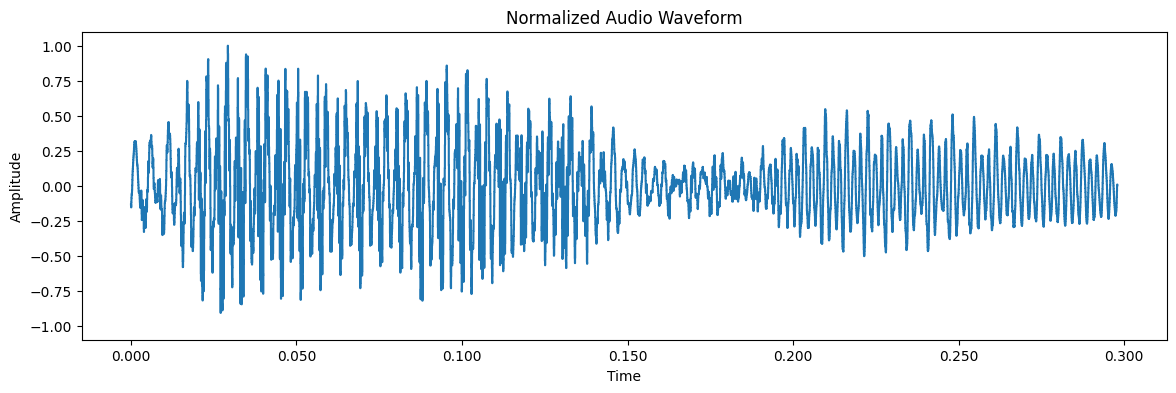

In [16]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y_norm, sr=sr)
plt.title("Normalized Audio Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


Extract MFCC features

MFCC = Mel Frequency Cepstral Coefficients
Used widely for speech recognition.

We extract:

13 MFCC coefficients

Over sliding windowsMFCC = Mel Frequency Cepstral Coefficients
Used widely for speech recognition.

We extract:

-13 MFCC coefficients

-Over sliding windows

MFCC shape: (13, 13)


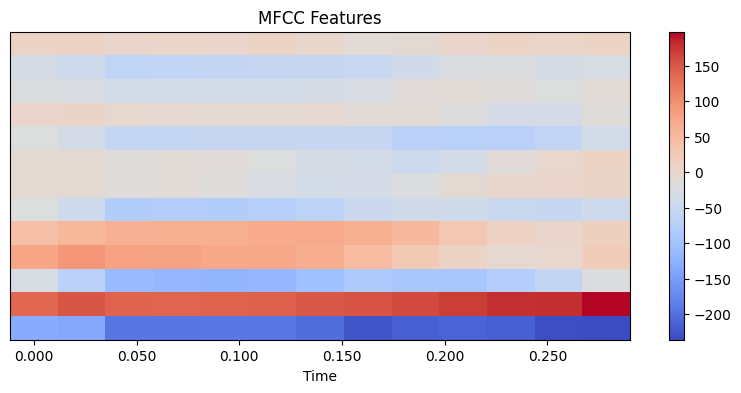

In [17]:
mfcc = librosa.feature.mfcc(y=y_norm, sr=sr, n_mfcc=13)

print("MFCC shape:", mfcc.shape)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis="time")
plt.colorbar()
plt.title("MFCC Features")
plt.show()


# PART 3 — VIDEO DATA PREPROCESSING

Import OpenCV

OpenCV (cv2) handles all video operations.



In [18]:
import cv2


Load video from URL

OpenCV cannot open URL directly, so we download it first.

In [20]:
import urllib.request

video_url = "https://avtshare01.rz.tu-ilmenau.de/avt-vqdb-uhd-1/test_1/segments/bigbuck_bunny_8bit_15000kbps_1080p_60.0fps_h264.mp4"

# Download locally
video_path = "video.mp4"
urllib.request.urlretrieve(video_url, video_path)

print("Video downloaded successfully!")


Video downloaded successfully!


Read video frame by frame

We:

1.Open video with cv2.VideoCapture()

2.Loop over frames

3.Convert each to grayscale

4.Resize to 128×128

5.Store in a list

In [21]:
cap = cv2.VideoCapture(video_path)
frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Resize
    resized = cv2.resize(gray, (128, 128))

    frames.append(resized)

cap.release()

print("Total frames processed:", len(frames))


Total frames processed: 600


# Display a sample processed frame

-We show one of the processed      grayscale frames.


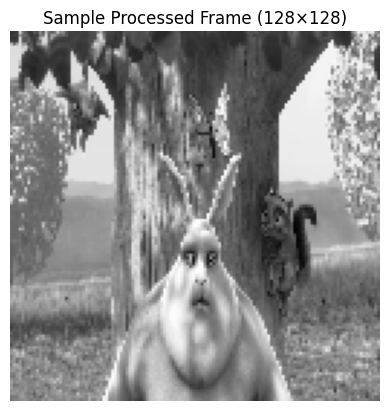

In [22]:
plt.imshow(frames[50], cmap="gray")
plt.title("Sample Processed Frame (128×128)")
plt.axis("off")
plt.show()
